# Predicting Heart Disease using ML

This notebook is an attempt to build a machine-learning model capable of predicting whether or not someone has 
heart disease based on their medical attributes. It explores various python based ML & Data Science libraries.

Approach 
1. Problem Statement
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

# Problem Statement
>Given clinical parameters about a patient, can we predict whether or not they have heart disease?

# Data
The original data came from the Cleveland data from the UCI Machine Learning Repository. (https://archive.ics.uci.edu/dataset/45/heart+disease)
There is also a version of it available on Kaggle (https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland).

# Evaluation
>If we can reach 95% accuracy at the prediction during the proof of concept, we'll pursue the project.


# A data Dictionary 
This database contains 13 attributes and a target variable. It has 8 nominal values and 5 numeric values. The detailed description of all these features are as follows:

1.  Age: Patients Age in years (Numeric)
2.  Sex: Gender (Male : 1; Female : 0) (Nominal)
3.  cp: Type of chest pain experienced by patient. This term categorized into 4 category.
        0 typical angina, 
        1 atypical angina, 
        2 non- anginal pain, 
        3 asymptomatic (Nominal)
4.  trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
5.  chol: Serum cholesterol in mg/dl (Numeric)
6.  fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7.  restecg: Result of electrocardiogram while at rest are represented in 3 distinct values
        0 : Normal
        1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >0.05 mV)
        2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
8.  thalach: Maximum heart rate achieved (Numeric)
9.  exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
11. slope: ST segment measured in terms of slope during peak exercise
    : up sloping; 1: flat; 2: down sloping(Nominal)
12. ca: The number of major vessels (0–3)(nominal)
13. thal: A blood disorder called thalassemia
0:  NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but       it is not normal(nominal)
14.  target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.

In [8]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [122]:
#Regular Exploratory & Data Analysis + Plotting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Model from Scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [3]:
df = pd.read_csv("heart-disease (1).csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

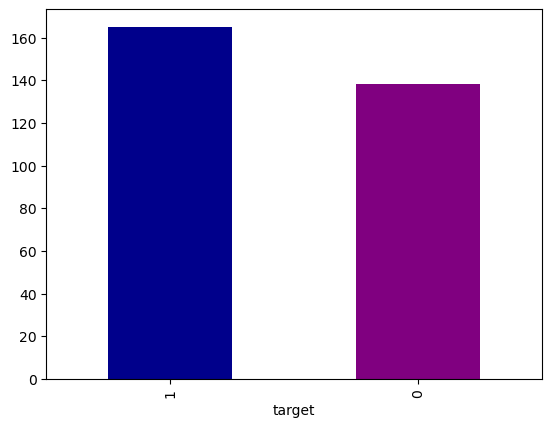

In [5]:
df["target"].value_counts().plot(kind = "bar", color = ["darkblue", "purple"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Heart Disease frequency to sex (Comparing different columns & how they relate to the target)

In [ ]:
df.sex.value_counts()

In [7]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Visualizing 

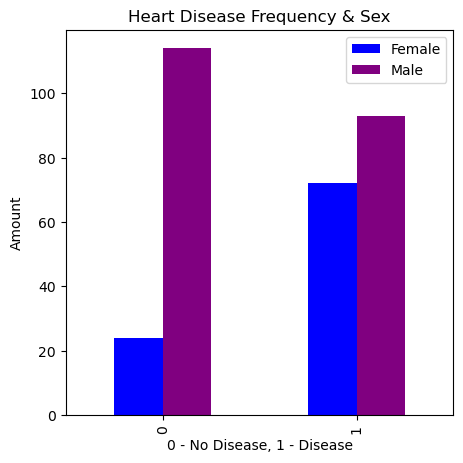

In [8]:
pd.crosstab(df.target, df.sex).plot(kind = "bar", 
                                    figsize = (5,5),
                                    color = ["blue", "purple"])

plt.title("Heart Disease Frequency & Sex")
plt.xlabel("0 - No Disease, 1 - Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);

Age vs Max Heart Rate for Heart Disease

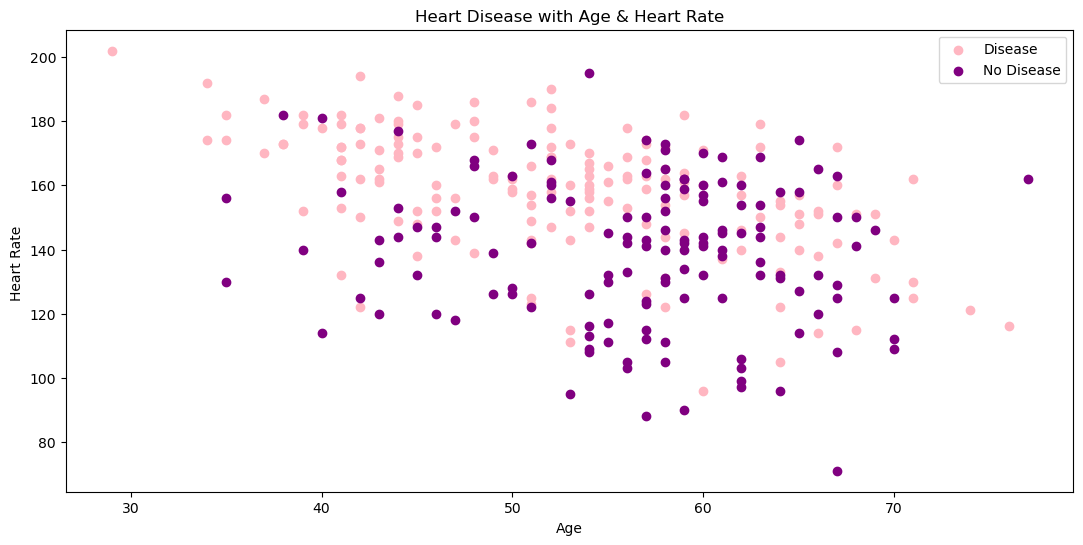

In [9]:
plt.figure(figsize=(13,6))

plt.scatter(df.age[df.target ==1],
            df.thalach[df.target ==1],
            c = "lightpink") 

plt.scatter(df.age[df.target ==0],
            df.thalach[df.target ==0],
            c = "purple")

plt.title("Heart Disease with Age & Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate ")
plt.legend(["Disease","No Disease"]);

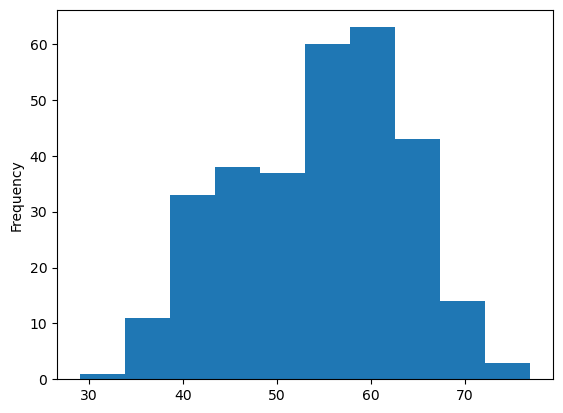

In [10]:
df.age.plot.hist();

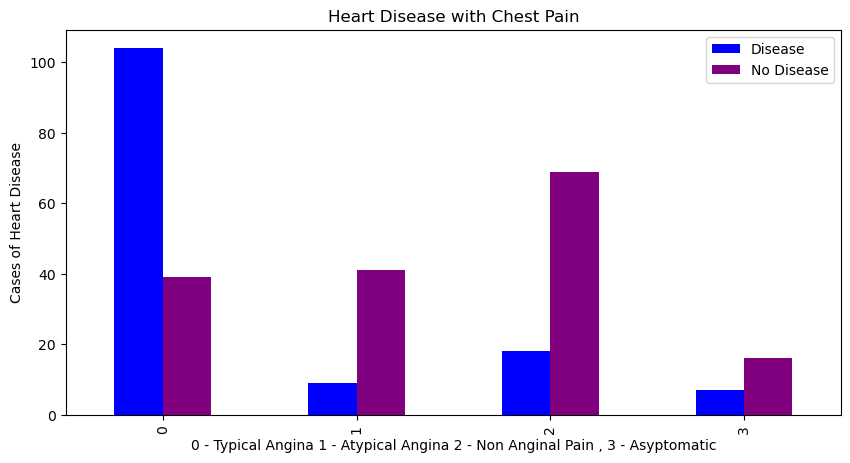

In [11]:
#Chest pain and Heart Disease Correlation 
#cp: Type of chest pain experienced by patient. 
#This term categorized into 4 category. 0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)

pd.crosstab(df.cp,df.target).plot(kind = "bar",
                                  figsize=(10,5),
                                 color=["blue","purple"])
plt.title("Heart Disease with Chest Pain")
plt.xlabel("0 - Typical Angina 1 - Atypical Angina 2 - Non Anginal Pain , 3 - Asyptomatic")
plt.ylabel("Cases of Heart Disease")
plt.legend(["Disease","No Disease"]);

# Correlation Matrix

TypeError: can only concatenate str (not "float") to str

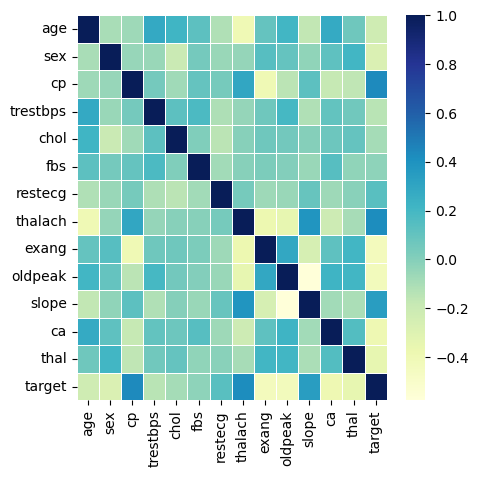

In [15]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(corr_matrix, 
                 annot = True, 
                 linewidths = 0.5, 
                 fmt = 0.2,
                 cmap= "YlGnBu");

# Modelling

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
 #Splitting Data
x= df.drop("target", axis =1)
y = df["target"]

#Split into Test and Train Set
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# Building a ML Model 
The data is now split into training and test set. Now the task is to identify and experiment the most suitable model to use. 
Three different models that were tried for this are as follows:

1. Logistic Regression
2. KNN
3. RandomForestClassifier

In [43]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "RandomForest": RandomForestClassifier()}

# Function to fit and score 
def fit_score(models, x_train, x_test, y_train, y_test):
    """
    x_train: training data, no labels
    x_test: testing data no labels
    y_train: training labels
    y_test: testing labels
    """
    np.random.seed(42)
    
    #Initilize a dictionary to keep model scores
    model_scores = {} 

    # Loop through models
    for name, model in models.items():
        # Fit the model to the training data
        model.fit(x_train, y_train)
    
        # Evaluate
        model_scores[name] = model.score(x_test, y_test)
    
    return model_scores


In [44]:
model_scores = fit_score(models = models,
                         x_train = x_train,
                         x_test = x_test,
                         y_train = y_train,
                         y_test = y_test)
model_scores

/Users/admin/Desktop/SampleML_Proj/heart-disease-project/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

<Axes: >

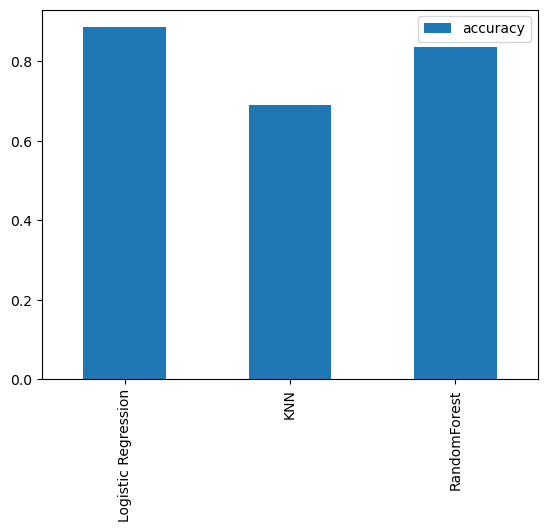

In [50]:
#Visualizing the results
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar()

# Tuning Hyperparameters 

In [62]:
#knn

train_scores = []
test_scores = []

#Create a list of different values fo n_neighbors
neighbors  = range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

#Loop through different
for i in neighbors:
    knn.set_params(n_neighbors= i)
    knn.fit(x_train,y_train)

    #Update training scores list
    train_scores.append(knn.score(x_train,y_train))

    #update test scores list
    test_scores.append(knn.score(x_test,y_test))
    

In [61]:
np.shape(train_scores)
np.shape(test_scores)


(0,)

Max KNN Score on the test data: 75.41%


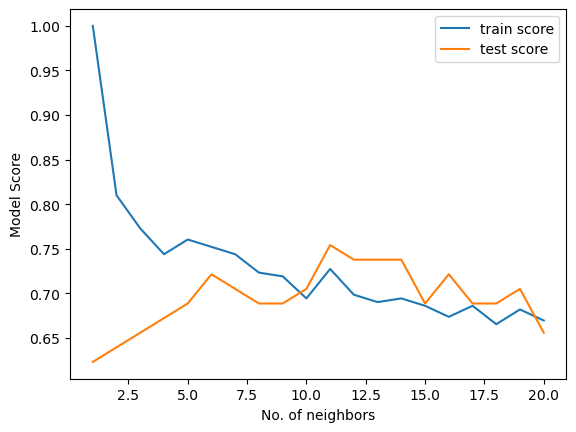

In [74]:
plt.plot(neighbors, train_scores, label ="train score")
plt.plot(neighbors, test_scores, label ="test score")
#plt.xticks(np.arrange(1,21,1))
plt.xlabel("No. of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Max KNN Score on the test data: {max(test_scores)*100:.2f}%")


# Hyperparameter tuning with RandomizedSearchCV

For logistic regression and RandomForestClassifier

In [89]:
#hyp grid for LogisticReg
log_reg_grid = {"C":np.logspace(-4,4,20), 
                "solver": ["liblinear"]}
#hyp grid for RFC
rf_grid = {"n_estimators": np.arange(10,100,50),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

HyperParameters set for both the models, now Tuning them using RandomizedSearchCV

Logistic Regression: 

In [82]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
             param_distributions = log_reg_grid,cv=5,
             n_iter= 20, verbose = True ) 

#fit random hyperparameter search model for LogisticReg
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [83]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [94]:
rslog_reg_score = rs_log_reg.score(x_test,y_test)
rslog_reg_score

0.8852459016393442

RandomForestClassifier:

In [101]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                      param_distributions = rf_grid,
                      cv=5, n_iter = 20, verbose = True)
rs_rf.fit(x_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [93]:
rs_rf_score = rs_rf.score(x_test, y_test)
rs_rf_score

0.819672131147541

In [92]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [95]:
#Comparing RandomizedSearchCV Scores with Old scores
model_scores , rs_rf_score, rslog_reg_score

({'Logistic Regression': 0.8852459016393442,
  'KNN': 0.6885245901639344,
  'RandomForest': 0.8360655737704918},
 0.819672131147541,
 0.8852459016393442)

# Tuning Hyperparameters using GridSearchCV

In [100]:
#Tuning LogisticRegression Model scores 
log_reg_grid = {"C": np.logspace(-4,4,30), "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(), 
                         param_grid= log_reg_grid,
                         cv = 5, verbose= True)
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [125]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [104]:
 #Make predictions with tuned model 

y_preds = gs_log_reg.predict(x_test)

# Evaluating the ML Classifier beyond accuracy
1. ROC Curve and AUC Curve
2. Confusion Matrix
3. Classification Report
4. Precision
5. Recall 
6. f1-score
   To make comparisons and evaluate, we need Predictions 

In [105]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [106]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

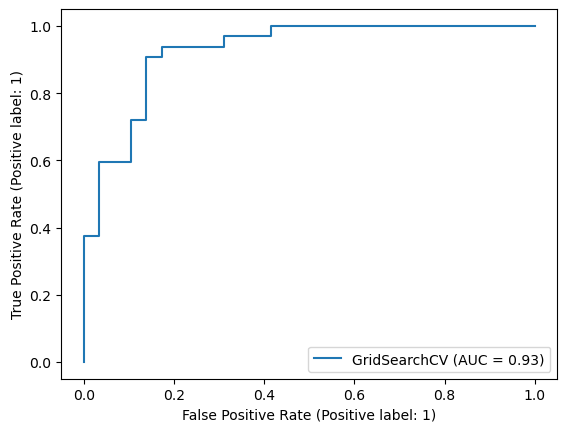

In [124]:
#Plot Roc curve and calculate AUC Metric 

RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test);

In [126]:
#Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [143]:
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

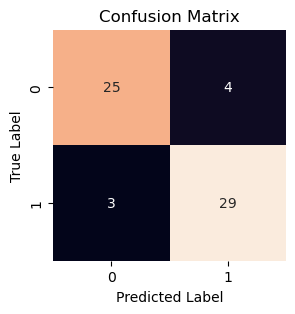

In [145]:
plot_conf_mat(y_test, y_preds)

In [146]:
#Classification Report, Recall & F1 Score that are Cross Validated

In [148]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [149]:
#Creating a new classifier with best parameters

In [153]:
clf = LogisticRegression(C= 0.20433597178569418, 
                         solver= 'liblinear')

In [165]:
#cv accuracy
cv_acc = cross_val_score(clf,x,y,cv=5, scoring="accuracy")
cv_acc =cv_acc.mean()

In [166]:
 cv_acc

0.8479781420765027

In [157]:
#cv precision
cv_prec = cross_val_score(clf,x,y,cv=5, scoring="precision")
cv_prec

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [159]:
cv_prec = np.mean(cv_prec)
cv_prec

0.8215873015873015

In [160]:
#cv recall
cv_recall = cross_val_score(clf,x,y,cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [163]:
#cv f1 score
cv_f1 = cross_val_score(clf,x,y,cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

<Axes: title={'center': 'Cross Validated Classification Metrics'}>

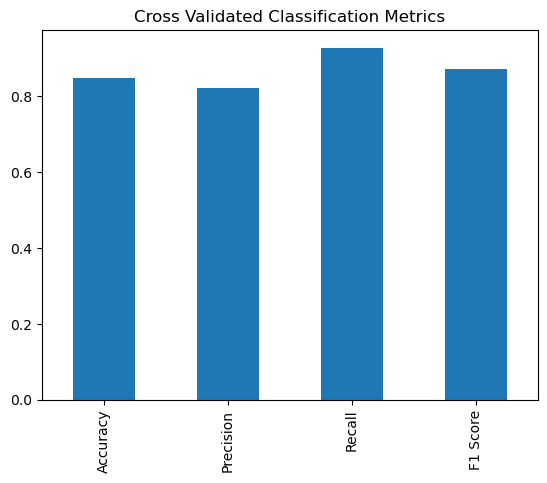

In [170]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_prec,
                          "Recall": cv_recall,
                          "F1 Score": cv_f1},
                          index = [0])

cv_metrics.T.plot.bar(title = "Cross Validated Classification Metrics", legend= False) 

# Feature Importance

In [171]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [172]:
clf = LogisticRegression(C = 0.20433597178569418, solver =  "liblinear")
clf.fit(x_train, y_train);

In [173]:
clf.coef_

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [174]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003167276981166473,
 'sex': -0.8604461876496617,
 'cp': 0.6606705956924419,
 'trestbps': -0.011569931456373254,
 'chol': -0.0016637425660326452,
 'fbs': 0.04386123481563001,
 'restecg': 0.3127581278180605,
 'thalach': 0.02459361121787892,
 'exang': -0.6041306062021752,
 'oldpeak': -0.5686283181242949,
 'slope': 0.4505162370067001,
 'ca': -0.6360987949046014,
 'thal': -0.6766338344936489}

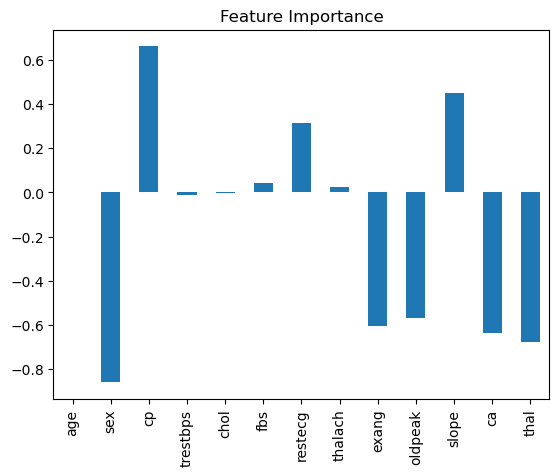

In [175]:
ft_df = pd.DataFrame(feature_dict, index = [0])
ft_df.T.plot.bar(title = "Feature Importance",legend = False);